# Exploring Movie Preferences: An Analysis of the Movielens 25M Dataset

### Importing necessary datasets

In [1]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv("C:/Users/Harvey/Downloads/genome-tags.csv")
df_2 = pd.read_csv("C:/Users/Harvey/Downloads/genome-scores.csv")
df_3 = pd.read_csv("C:/Users/Harvey/Downloads/links.csv")
df_4 = pd.read_csv("C:/Users/Harvey/Downloads/movies.csv")
df_5 = pd.read_csv("C:/Users/Harvey/Downloads/tags.csv")
df_6 = pd.read_csv("C:/Users/Harvey/Downloads/ratings.csv")



### Identifying key information about the datasets

In [2]:
display(df_1.columns)
display(df_2.columns)
display(df_3.columns)
display(df_4.columns)
display(df_5.columns)
display(df_6.columns)

display(df_1.shape)
display(df_2.shape)
display(df_3.shape)
display(df_4.shape)
display(df_5.shape)
display(df_6.shape)

Index(['tagId', 'tag'], dtype='object')

Index(['movieId', 'tagId', 'relevance'], dtype='object')

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Index(['movieId', 'title', 'genres'], dtype='object')

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

(1128, 2)

(15584448, 3)

(62423, 3)

(62423, 3)

(1093360, 4)

(25000095, 4)

## How many movies are released each year? What is the percentage of change over time?

### Merging two of the datasets with time values

In [3]:
df_merged = pd.merge(df_5, df_6, how="outer")

### Identifying key information about the merge

In [4]:
print(df_merged["timestamp"].count())
print(f"Number of NaN values in timestamp is {df_merged['timestamp'].isna().sum()}")
print(f"Ratio of NaN values to valid values is {df_merged['timestamp'].isna().sum()/df_merged['timestamp'].count()}")

26093348
Number of NaN values in timestamp is 0
Ratio of NaN values to valid values is 0.0


In [5]:
#df_merged.dropna( inplace=True)


### Adding a specific column for a date time formate from timestamp

In [6]:
import datetime
df_merged["datetime"] = df_merged["timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x))

### Displaying key information about the merge

In [7]:
df_merged = df_merged.sort_values(by='datetime', ascending=True)
print(df_merged.tail(10))
df_merged.shape

          userId  movieId  tag   timestamp  rating            datetime
14301159   85523    59315  NaN  1574327393     4.0 2019-11-21 17:09:53
14301178   85523   122912  NaN  1574327399     4.5 2019-11-21 17:09:59
14301161   85523    60069  NaN  1574327406     4.5 2019-11-21 17:10:06
14301191   85523   195165  NaN  1574327424     3.0 2019-11-21 17:10:24
14301174   85523   109487  NaN  1574327445     4.5 2019-11-21 17:10:45
14301186   85523   168252  NaN  1574327479     4.0 2019-11-21 17:11:19
2377862     8642   202101  NaN  1574327512     2.0 2019-11-21 17:11:52
14301199   85523   204704  NaN  1574327533     4.0 2019-11-21 17:12:13
2377818     8642   122914  NaN  1574327549     4.0 2019-11-21 17:12:29
14301183   85523   149406  NaN  1574327703     4.5 2019-11-21 17:15:03


(26093348, 6)

### Extracting year values from each row and displaying key information for the new dataframe

In [8]:
from datetime import datetime

df_merged["date_year"] = df_merged["datetime"].dt.year
display(df_merged.head(10))

yearly_movies = df_merged.groupby('date_year')[['movieId']].count()
print(df_merged["date_year"].unique())
print(yearly_movies)
print(df_merged.shape)

,userId,movieId,tag,timestamp,rating,datetime,date_year
1420168,2262,1079,NaN,789652009,3.0,1995-01-09 19:46:49,1995
1420125,2262,47,NaN,789652009,5.0,1995-01-09 19:46:49,1995
1420119,2262,21,NaN,789652009,3.0,1995-01-09 19:46:49,1995
7728162,42937,32,NaN,822873600,5.0,1996-01-29 08:00:00,1996
16938306,102689,1,NaN,822873600,4.0,1996-01-29 08:00:00,1996
20324602,124805,10,NaN,822873600,3.0,1996-01-29 08:00:00,1996
20324603,124805,11,NaN,822873600,4.0,1996-01-29 08:00:00,1996
20324605,124805,21,NaN,822873600,5.0,1996-01-29 08:00:00,1996
20324607,124805,45,NaN,822873600,5.0,1996-01-29 08:00:00,1996
20324608,124805,58,NaN,822873600,5.0,1996-01-29 08:00:00,1996


[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
           movieId
date_year         
1995             3
1996       1429280
1997        626849
1998        272153
1999       1056161
2000       1737245
2001       1057762
2002        777868
2003        920780
2004       1047089
2005       1613259
2006       1068464
2007        959363
2008       1037817
2009        874522
2010        844001
2011        732568
2012        682525
2013        569950
2014        522136
2015       1705432
2016       1846734
2017       1780518
2018       1631189
2019       1299680
(26093348, 7)


### Adding another column for better visualization

In [9]:
yearly_movies = pd.DataFrame(yearly_movies)
yearly_movies = yearly_movies.reset_index()
yearly_movies["movieId_count"] = yearly_movies["movieId"]
yearly_movies["movieId_count_million"] = yearly_movies["movieId"]/1000000
yearly_movies.columns

Index(['date_year', 'movieId', 'movieId_count', 'movieId_count_million'], dtype='object')

### Plotting movies released yearly

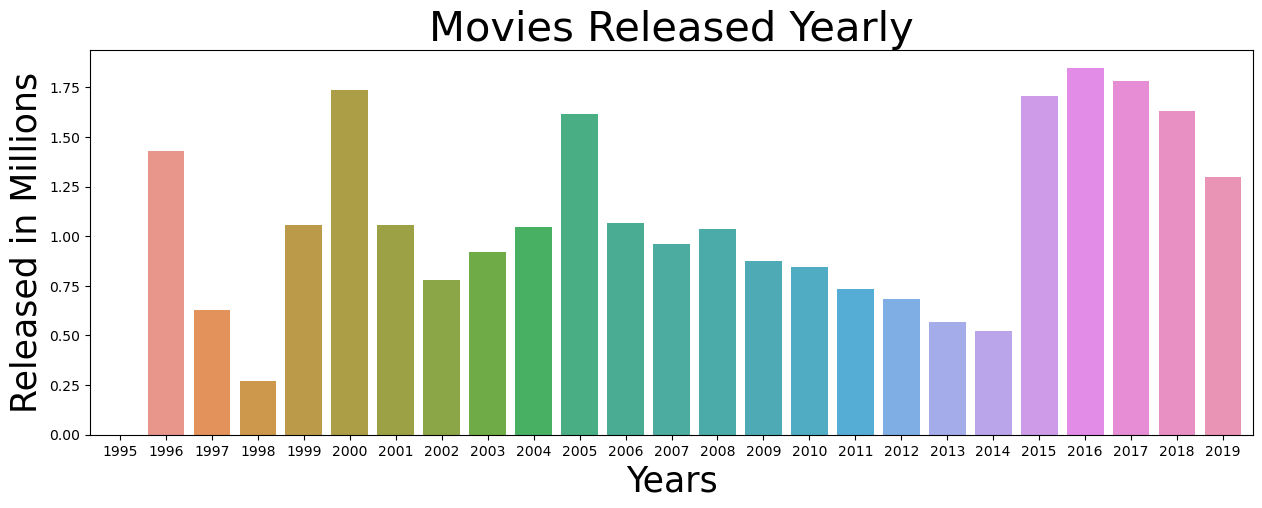

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
yearly_movies = pd.DataFrame(yearly_movies)
sns.barplot(x='date_year', y="movieId_count_million", data = yearly_movies)

plt.margins(x=0.01)
plt.title("Movies Released Yearly", fontsize=30)
plt.xlabel("Years", fontsize=25)
plt.ylabel("Released in Millions", fontsize=25)

# Display the plot
plt.show()

### Identifying key information about the new dataset to be used

In [11]:
yearly_movies["percent_increase"] = yearly_movies["movieId"].pct_change()
yearly_movies.columns
display(yearly_movies.head(10))
print(yearly_movies.shape)

,date_year,movieId,movieId_count,movieId_count_million,percent_increase
0,1995,3,3,0.000003,NaN
1,1996,1429280,1429280,1.429280,476425.666667
2,1997,626849,626849,0.626849,-0.561423
3,1998,272153,272153,0.272153,-0.565840
4,1999,1056161,1056161,1.056161,2.880762
5,2000,1737245,1737245,1.737245,0.644868
6,2001,1057762,1057762,1.057762,-0.391127
7,2002,777868,777868,0.777868,-0.264610
8,2003,920780,920780,0.920780,0.183723
9,2004,1047089,1047089,1.047089,0.137176


(25, 5)


### Plotting increase in movies released yearly

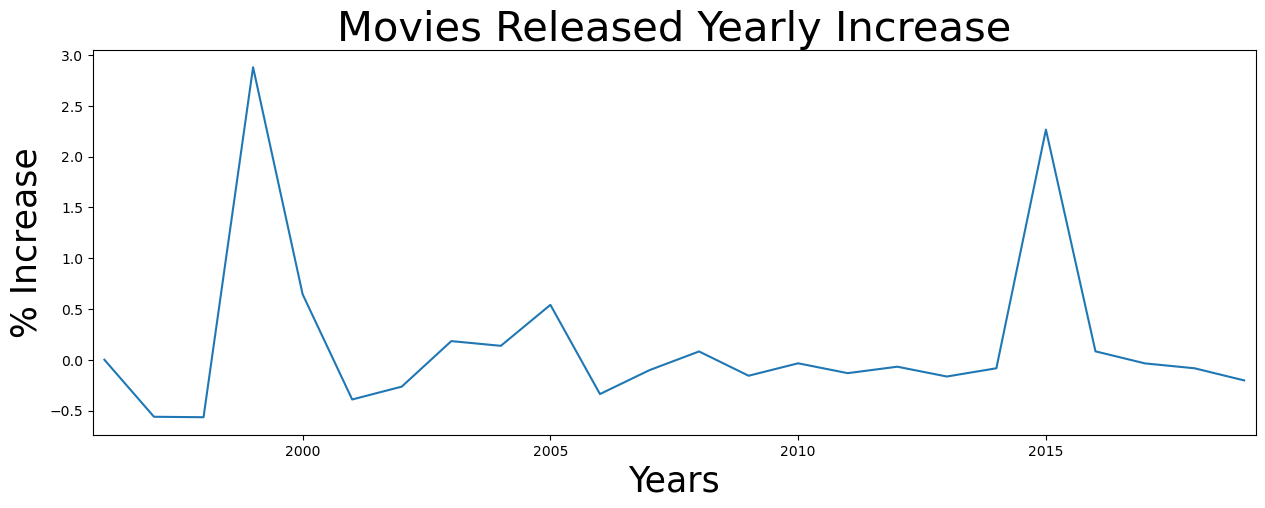

In [12]:
plt.figure(figsize=(15,5))
yearly_movies = pd.DataFrame(yearly_movies)
yearly_movies.loc[1,"percent_increase"] = 0
sns.lineplot(x='date_year', y="percent_increase", data = yearly_movies)

plt.margins(x=0.01)
plt.title("Movies Released Yearly Increase", fontsize=30)
plt.xlabel("Years", fontsize=25)
plt.ylabel("% Increase", fontsize=25)

# Display the plot
plt.show()

## What are the most popular genre of movies?

In [13]:
display(df_4.head(10))
print(df_4["genres"].unique())
genre_popularity = df_4['genres'].value_counts()
genre_popularity = pd.DataFrame(genre_popularity)
top_10_genre = genre_popularity.iloc[0:9]
display(genre_popularity.head(10))
display(top_10_genre)
print(top_10_genre.columns)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Children|Comedy|Fantasy|Mystery' 'Children|Comedy|Crime|Fantasy'
 'Comedy|Horror|Mystery|Sci-Fi|Western']


,genres
Drama,9056
Comedy,5674
(no genres listed),5062
Documentary,4731
Comedy|Drama,2386
Drama|Romance,2126
Horror,1661
Comedy|Romance,1577
Comedy|Drama|Romance,1044
Drama|Thriller,933


,genres
Drama,9056
Comedy,5674
(no genres listed),5062
Documentary,4731
Comedy|Drama,2386
Drama|Romance,2126
Horror,1661
Comedy|Romance,1577
Comedy|Drama|Romance,1044


Index(['genres'], dtype='object')


### Plotting the top 10 movie genres

Text(0, 0.5, 'Number of Movies Released')

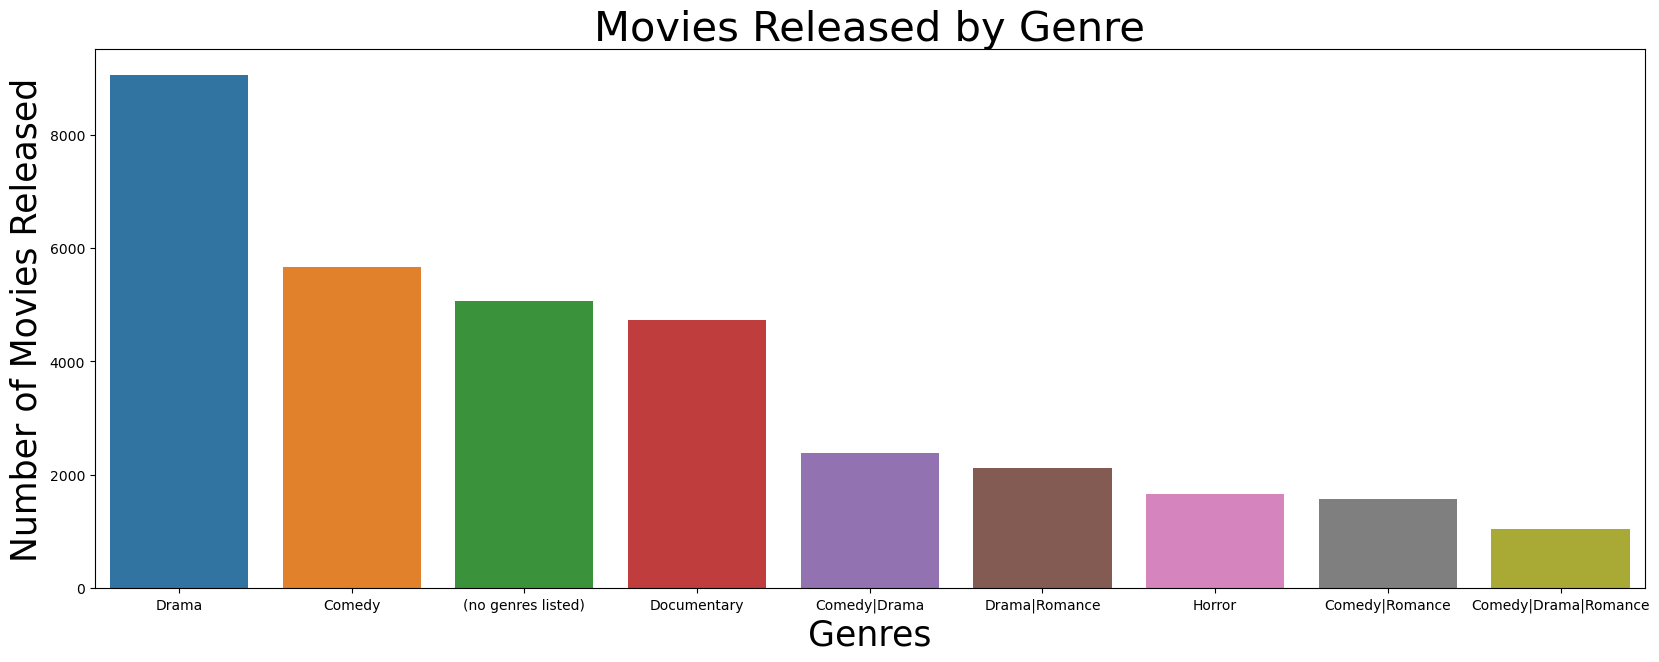

In [14]:
plt.figure(figsize=(20,7))
sns.barplot(x=top_10_genre.index, y="genres", data = top_10_genre)

plt.margins(x=0.01)
plt.title("Movies Released by Genre", fontsize=30)
plt.xlabel("Genres", fontsize=25)            
plt.ylabel("Number of Movies Released", fontsize=25)

## Does the taste of movies changes over time?

In [15]:
import re

df_4["title"] = df_4["title"].astype(str)

df_4["movie_year"] = df_4["title"].str.extract(r"\((\d{4})\)$", expand=False)
df_4['movie_year'] = df_4['movie_year'].fillna('0')
df_4["movie_year"] = df_4["movie_year"].astype(int)

display(df_4.tail(10))
display(df_4["movie_year"].unique)

most_common_genres = df_4.groupby("movie_year")["genres"].apply(lambda x: x.str.split("|").explode().mode()[0])
most_common_genres = pd.DataFrame(most_common_genres)

display(most_common_genres)

,movieId,title,genres,movie_year
62413,209145,Liberté (2019),Drama,2019
62414,209147,The Carpet of Horror (1962),Crime|Horror,1962
62415,209151,Mao Zedong 1949 (2019),(no genres listed),2019
62416,209153,Happy Flight (2008),Comedy|Drama,2008
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,2008
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


<bound method Series.unique of 0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
62418    2018
62419    2001
62420    2018
62421    2001
62422    1962
Name: movie_year, Length: 62423, dtype: int32>

,genres
movie_year,
0,(no genres listed)
1874,Documentary
1878,(no genres listed)
1880,Documentary
1883,(no genres listed)
...,...
2015,Drama
2016,Drama
2017,Drama


Text(0, 0.5, 'Most popular genre')

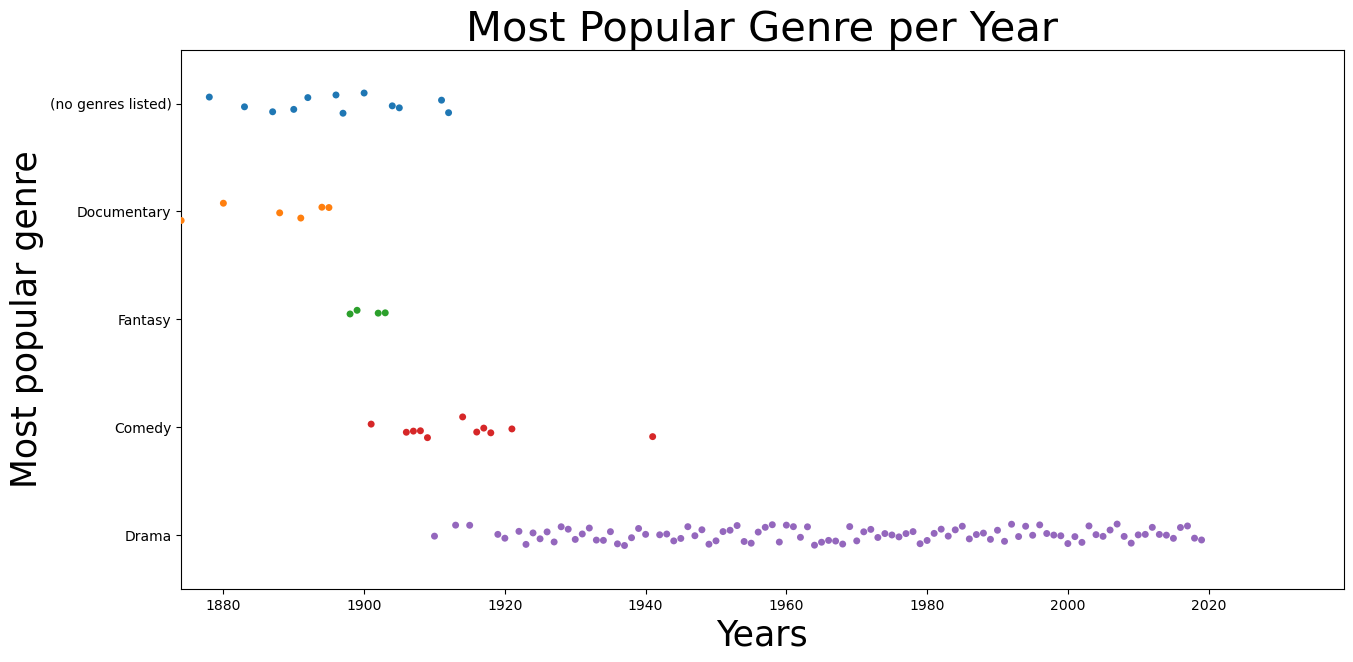

In [16]:
yearly_movies.loc[1,"count"] = 0
plt.figure(figsize=(15,7))
sns.stripplot(x=most_common_genres.index, y='genres', data = most_common_genres)

plt.margins(x=0.01)
plt.xlim(1874,)
plt.title("Most Popular Genre per Year", fontsize=30)
plt.xlabel("Years", fontsize=25)            
plt.ylabel("Most popular genre", fontsize=25)

## What are the top 20 movies that has the top amount of users rating and has the highest rate?

In [17]:
display(df_4.head(10))
display(df_6.head(10))
merged_df = pd.merge(df_4,df_6, how='inner', on='movieId')
#display(merged_df.head(10))
#display(merged_df.columns)

ratings_count = merged_df.groupby('title')['rating'].count()
ratings_mean = merged_df.groupby('title')['rating'].mean()

sorted_ratings_count = ratings_count.sort_values(ascending=False)
top_sorted_ratings_count = sorted_ratings_count.iloc[0:20]

top_sorted_ratings_count_frame = pd.DataFrame(top_sorted_ratings_count)
ratings_mean_frame = pd.DataFrame(ratings_mean)

merged_df2 = pd.merge(top_sorted_ratings_count_frame,ratings_mean_frame, how='inner', on='title')

# Display the top 20 most rated movies
#display(top_sorted_ratings_count_frame)

ratings_average = top_sorted_ratings_count_frame.mean()
display(merged_df2)

,movieId,title,genres,movie_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


,rating_x,rating_y
title,,
Forrest Gump (1994),81491,4.048011
"Shawshank Redemption, The (1994)",81482,4.413576
Pulp Fiction (1994),79672,4.188912
"Silence of the Lambs, The (1991)",74127,4.151342
"Matrix, The (1999)",72674,4.154099
Star Wars: Episode IV - A New Hope (1977),68717,4.120189
Jurassic Park (1993),64144,3.679175
Schindler's List (1993),60411,4.247579
Braveheart (1995),59184,4.002273


In [18]:
merged_df2_sorted = merged_df2.sort_values('rating_y', ascending=False)
display(merged_df2_sorted)

,rating_x,rating_y
title,,
"Shawshank Redemption, The (1994)",81482,4.413576
"Godfather, The (1972)",52498,4.324336
"Usual Suspects, The (1995)",55366,4.284353
Schindler's List (1993),60411,4.247579
Fight Club (1999),58773,4.228311
Pulp Fiction (1994),79672,4.188912
"Matrix, The (1999)",72674,4.154099
"Silence of the Lambs, The (1991)",74127,4.151342
Star Wars: Episode V - The Empire Strikes Back (1980),57361,4.144122


### Plotting top 20 most rated movies according to their average rating

(3.5, 5.0)

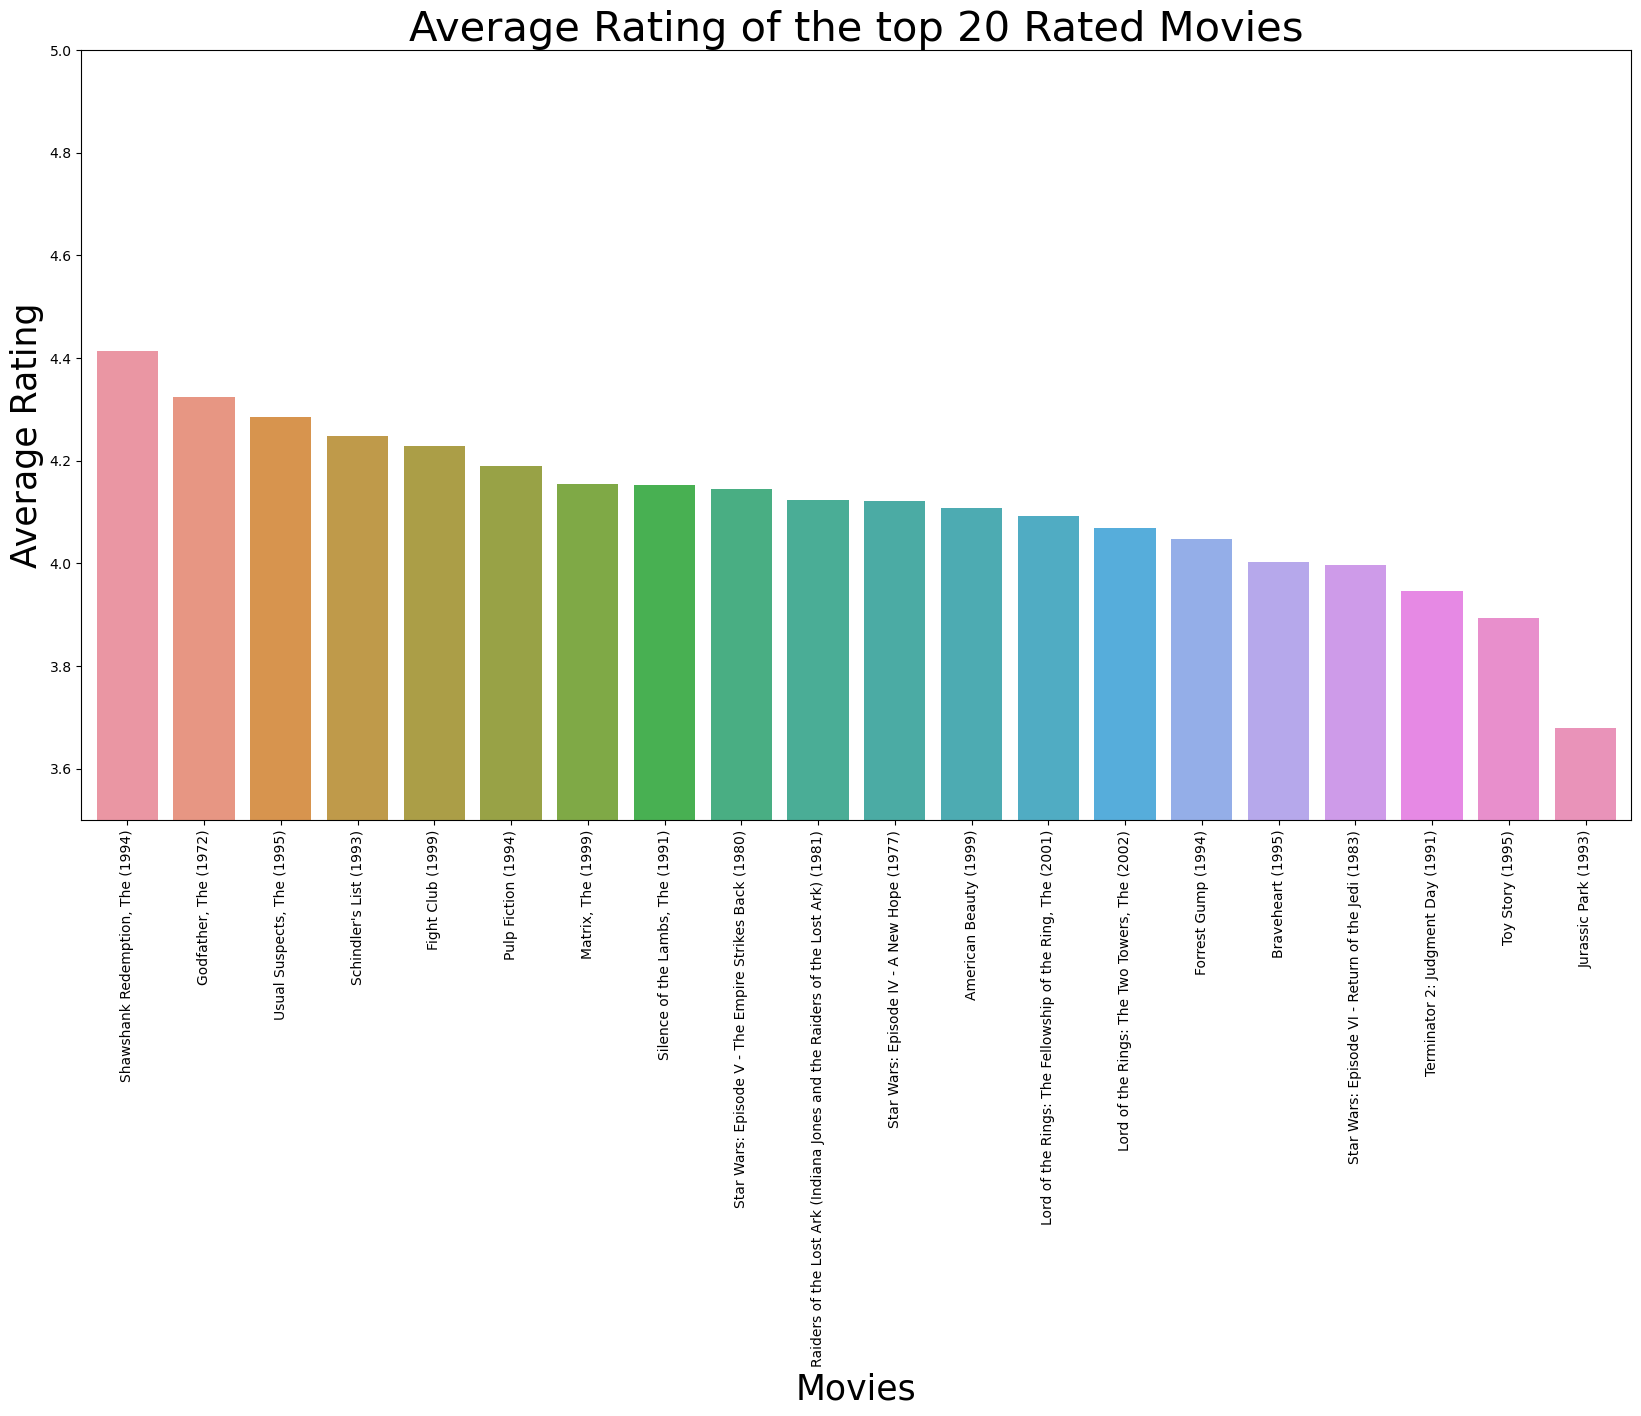

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=merged_df2_sorted.index, y='rating_y', data = merged_df2_sorted)

plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.title("Average Rating of the top 20 Rated Movies", fontsize=30)
plt.xlabel("Movies", fontsize=25)            
plt.ylabel("Average Rating", fontsize=25)
plt.ylim(3.5,5)

## What is the most of popular season for releasing movies?

In [20]:
df_merged.head(10)

,userId,movieId,tag,timestamp,rating,datetime,date_year
1420168,2262,1079,NaN,789652009,3.0,1995-01-09 19:46:49,1995
1420125,2262,47,NaN,789652009,5.0,1995-01-09 19:46:49,1995
1420119,2262,21,NaN,789652009,3.0,1995-01-09 19:46:49,1995
7728162,42937,32,NaN,822873600,5.0,1996-01-29 08:00:00,1996
16938306,102689,1,NaN,822873600,4.0,1996-01-29 08:00:00,1996
20324602,124805,10,NaN,822873600,3.0,1996-01-29 08:00:00,1996
20324603,124805,11,NaN,822873600,4.0,1996-01-29 08:00:00,1996
20324605,124805,21,NaN,822873600,5.0,1996-01-29 08:00:00,1996
20324607,124805,45,NaN,822873600,5.0,1996-01-29 08:00:00,1996
20324608,124805,58,NaN,822873600,5.0,1996-01-29 08:00:00,1996


In [21]:
import datetime

df_merged["timestamp"] = pd.to_datetime(df_merged['timestamp'], unit='s')
df_merged['month'] = df_merged['timestamp'].dt.month
df_merged.head(10)

,userId,movieId,tag,timestamp,rating,datetime,date_year,month
1420168,2262,1079,NaN,1995-01-09 11:46:49,3.0,1995-01-09 19:46:49,1995,1
1420125,2262,47,NaN,1995-01-09 11:46:49,5.0,1995-01-09 19:46:49,1995,1
1420119,2262,21,NaN,1995-01-09 11:46:49,3.0,1995-01-09 19:46:49,1995,1
7728162,42937,32,NaN,1996-01-29 00:00:00,5.0,1996-01-29 08:00:00,1996,1
16938306,102689,1,NaN,1996-01-29 00:00:00,4.0,1996-01-29 08:00:00,1996,1
20324602,124805,10,NaN,1996-01-29 00:00:00,3.0,1996-01-29 08:00:00,1996,1
20324603,124805,11,NaN,1996-01-29 00:00:00,4.0,1996-01-29 08:00:00,1996,1
20324605,124805,21,NaN,1996-01-29 00:00:00,5.0,1996-01-29 08:00:00,1996,1
20324607,124805,45,NaN,1996-01-29 00:00:00,5.0,1996-01-29 08:00:00,1996,1
20324608,124805,58,NaN,1996-01-29 00:00:00,5.0,1996-01-29 08:00:00,1996,1


### Extracting the month values from timestamp and converting it to word in months

In [22]:
months_initial = df_merged['month'].unique()
df_merged['month'] = df_merged['month'].astype(str)
print(months_initial)
months_final = {'1': "January", '2': "February", '3': "March", '4': "April", '5': "May", '6': "June", '7': "July", '8': "August",
 '9': "September", '10': "October", '11': "November", '12': "December"}

df_merged['month'] = df_merged['month'].replace(months_final)
months_final = df_merged['month'].unique()
print(months_final)

monthly_movies = df_merged.groupby('month')[['movieId']].count()
display(monthly_movies)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


,movieId
month,
April,1996265
August,2143749
December,2308276
February,1922053
January,2292074
July,2271530
June,2120063
March,2205547
May,2244501


In [23]:
monthly_movies_sorted = monthly_movies.sort_values('movieId', ascending=False)
monthly_movies_sorted["released_in_millions"] = monthly_movies_sorted["movieId"]/1000000
display(monthly_movies_sorted)

,movieId,released_in_millions
month,,
November,2511535,2.511535
December,2308276,2.308276
January,2292074,2.292074
July,2271530,2.271530
May,2244501,2.244501
October,2212058,2.212058
March,2205547,2.205547
August,2143749,2.143749
June,2120063,2.120063


### Plotting the most popular season according to months in releasing movies

(1.5, 3.0)

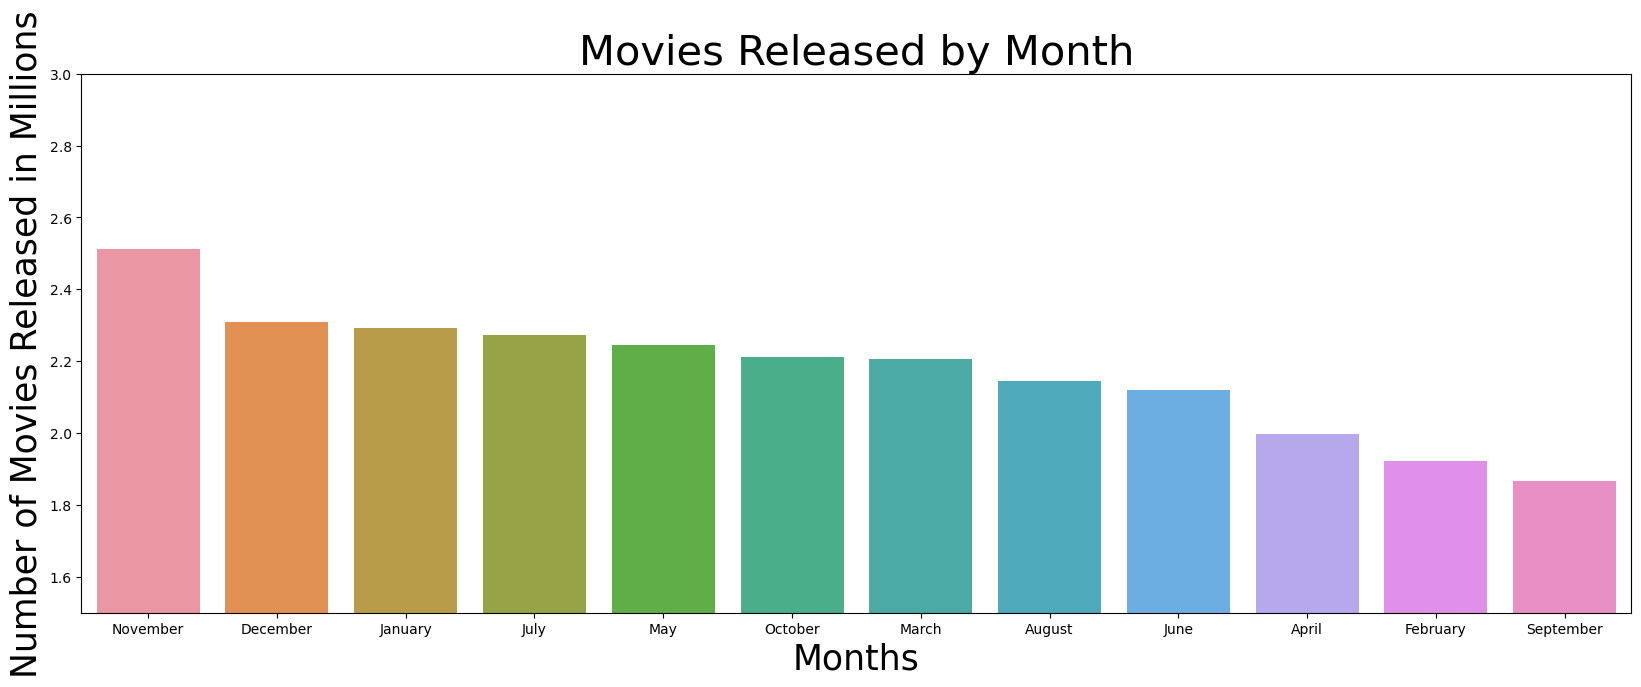

In [24]:
plt.figure(figsize=(20,7))
sns.barplot(x=monthly_movies_sorted.index, y="released_in_millions", data = monthly_movies_sorted)

plt.margins(x=0.01)
plt.title("Movies Released by Month", fontsize=30)
plt.xlabel("Months", fontsize=25)            
plt.ylabel("Number of Movies Released in Millions", fontsize=25)
plt.ylim(1.5,3)